In [1]:
import random
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# Generate data by hand
ones = [[[0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0]], 
        [[0, 1, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 1, 1, 1, 0]],
        [[0, 0, 1, 0, 0],
         [0, 1, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0]],
        [[0, 0, 0, 1, 0],
         [0, 0, 1, 1, 0],
         [0, 0, 1, 0, 0],
         [0, 1, 1, 0, 0],
         [0, 1, 0, 0, 0]],
        [[0, 0, 0, 0, 1],
         [0, 0, 0, 1, 0],
         [0, 0, 1, 0, 0],
         [0, 1, 0, 0, 0],
         [1, 0, 0, 0, 0]],
        [[0, 0, 0, 0, 1],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0]]]

zeros = [[[0, 1, 1, 1, 0],
         [0, 1, 0, 1, 0],
         [0, 1, 0, 1, 0],
         [0, 1, 0, 1, 0],
         [0, 1, 1, 1, 0]], 
        [[0, 0, 1, 0, 0],
         [0, 1, 0, 1, 0],
         [0, 1, 0, 1, 0],
         [0, 1, 0, 1, 0],
         [0, 0, 1, 0, 0]],
        [[0, 0, 1, 0, 0],
         [0, 1, 0, 1, 0],
         [0, 1, 0, 1, 0],
         [0, 1, 0, 1, 0],
         [0, 1, 1, 1, 0]],
        [[0, 0, 1, 1, 0],
         [0, 1, 0, 0, 1],
         [0, 1, 0, 0, 1],
         [0, 1, 0, 1, 0],
         [0, 1, 1, 0, 0]],
        [[1, 1, 1, 1, 1],
         [1, 0, 0, 0, 1],
         [1, 0, 1, 0, 1],
         [1, 0, 0, 0, 1],
         [1, 1, 1, 1, 1]],
        [[0, 1, 1, 1, 0],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [0, 1, 1, 1, 0]]]


for i, item in enumerate(ones):
    temp = [None] * 2
    temp[0] = item
    temp[1] = 1
    ones[i] = temp
for i, item in enumerate(zeros):
    temp = [None] * 2
    temp[0] = item
    temp[1] = 0
    zeros[i] = temp


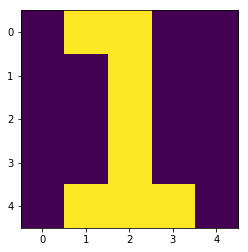

In [3]:
plt.imshow(ones[1][0])

In [4]:
# labels: 0 or 1
# train, test = 4 x 2 images, 2 x 2 images

# Input: (1, 5, 5) array 
    # turn into numpy first
    # flatten into (1, 25) input
# Weights_1: (1, 25) vector
# Bias: (1, 1) vector
# Weights_final: (1) vector

In [5]:
TRAIN_LENGTH = 8
TEST_LENGTH = 4

labeled_dataset = ones + zeros
labeled_dataset = np.array(random.sample(labeled_dataset, len(labeled_dataset)))

dataset = np.array([item[0] for item in labeled_dataset])
labels = np.array([item[1] for item in labeled_dataset])

training_data = dataset[0:TRAIN_LENGTH]
testing_data = dataset[TRAIN_LENGTH:]

training_labels = labels[0:TRAIN_LENGTH]
testing_labels = labels[TRAIN_LENGTH:]

In [135]:
class Model():
    def __init__(self):
        self.weights_1 = np.random.rand(1, 25)
        self.bias = np.random.rand(1, 1)
    
    def forward(self, x):
        x = x.reshape(-1, 25)
        y = np.matmul(x, self.weights_1.transpose()) + self.bias
        return sigmoid(y)
    
    def back_prop(self, label, y, lr):
        e = label - y
        self.weights_1 = self.weights_1 + lr * x.reshape(1, 25) * (e)
        self.bias = self.bias + lr * (e)


def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [136]:
# One forward pass:
model = Model()

x = training_data[0]
y = model.forward(x)


In [137]:
# One backward propagation:

lr = 0.01
label = training_labels[0]
model.back_prop(label, y, lr)


In [225]:
lr = 0.03
epochs = 100

model = Model()

test_losses = []
train_losses = []

for e in range(epochs):
    running_train_loss = 0
    
    for i, x in enumerate(training_data):
        label = training_labels[i]

        # Forward pass
        y = model.forward(x)
        running_train_loss += np.abs(label - y)
        # Backward pass
        model.back_prop(label, y, lr)
    
    # Validation
    y = model.forward(testing_data)
    test_loss = np.sum(np.abs(label - y))

    test_losses.append(test_loss/4)
    train_losses.append(running_train_loss[0][0]/8)

    if e%5 == 0:
        print('Epoch {}: train_loss = {:.3}, test_loss = {:.3}'.format(e + 1, running_train_loss[0][0], test_loss))

    y = [predict(i) for i in y]
    # Breaks when 100% accuracy in testing dataset is achieved
    if (np.sum(y == testing_labels)/len(y) == 1.0):
        break

    

Epoch 1: train_loss = 4.14, test_loss = 3.89
Epoch 6: train_loss = 3.82, test_loss = 2.91


(4, 5, 5)

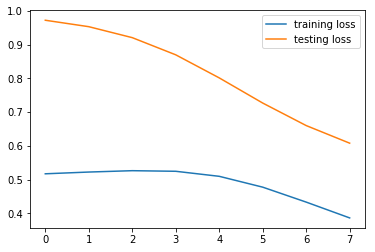

In [226]:
plt.plot(train_losses, label = 'training loss')
plt.plot(test_losses, label = 'testing loss')
plt.legend(loc = 'upper right')

In [227]:
def predict (y):
    if y > 0.5: 
        return 1
    return 0

y = model.forward(testing_data)
y = [predict(i) for i in y]

np.sum(y == testing_labels)/len(y)


1.0